# Laser OD Calculation

It should be noted that there are not hard cutoffs when it comes to laser safety. Even weak lasers might be dangerous to your eyes if 
- they are large in diameter (so that they focus to a small spot), 
- if you have been working in darkness so that your pupils are wide open
- if you are exposed for a long time.

That being said, reasonable guidelines can be issued. The typical formula to calculate the Optical density required for a given laser light is
$$
OD = \log_{10}\Big\{\frac{I_0}{\text{MPE}}\Big\}
$$

The following charts come from Wikipedia:

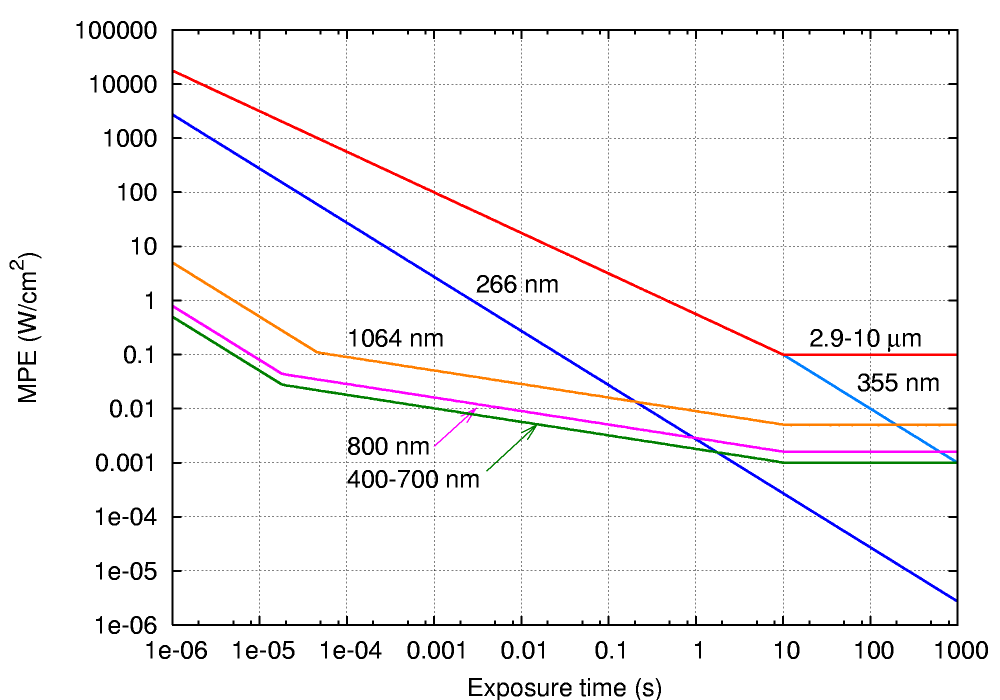

Pulsed lasers can cause more damage because the intensity during the pulse is much higher than the average:

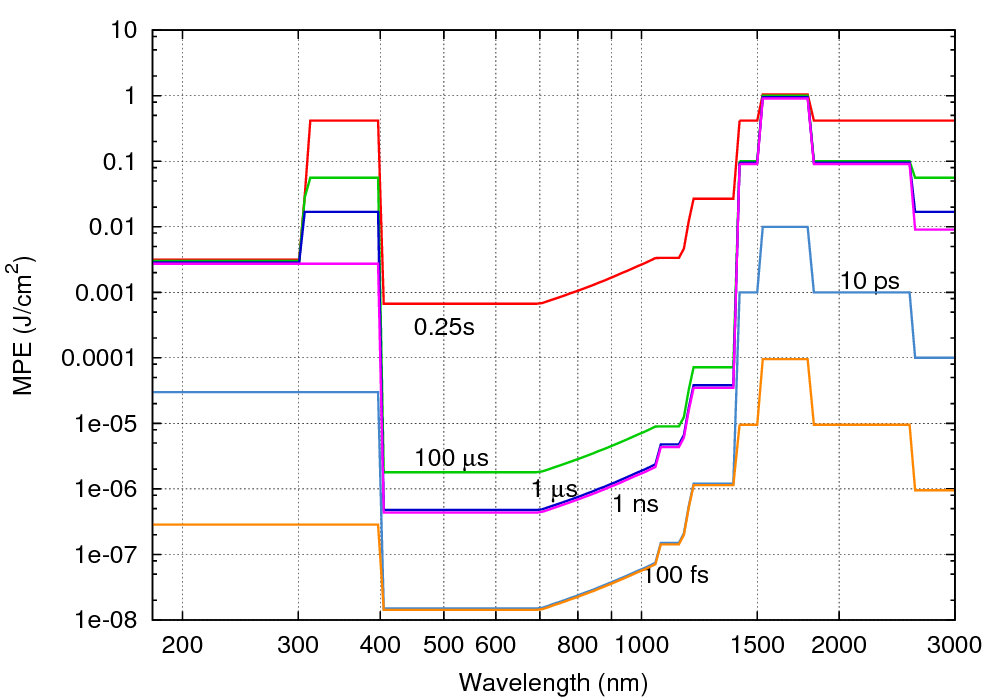

But thankfully we don't really have pulsed lasers in B232.

Now we have to calculate the worst case intensity given our lasers.

From Wikipedia, the maximum diameter of a dialated pupil is approximately 7mm. The MPE values consider the worst case scenario when the maximum intensity is spread over the entire pupil.  

In [53]:
import numpy as np

$$
I_0 = \frac{2P}{\pi w_0^2}
$$

In [29]:
def peakIntensity(totalPower, waist):
    return 2*totalPower/(np.pi*waist**2)

In [34]:
peakIntensity(3,10e-3)

19098.59317102744

In [31]:
def OD(peakI, MPE):
    return np.log10(peakI/MPE)

## 3W TA

In [38]:
pupilRadius = 0.7/2
conservativeMPE=1e-3

The MPEs for the laser wavelengths we use don't vary very much. They are all within 1 mW/cm^2 - 3 mW/cm^2, so we conservatively use the minimum here for convenience.

### Green Pump Laser:

In [49]:
OD(peakIntensity(10,pupilRadius), conservativeMPE)

4.715744034269296

Therefore OD 5 is recommended.

### 3W 850nm TA

In [50]:
OD(peakIntensity(3,pupilRadius), conservativeMPE)

4.192865288988958

Therefore OD 5 is recommended.

### 3W 795nm TA

In [51]:
OD(peakIntensity(3,pupilRadius), conservativeMPE)

4.192865288988958

Therefore OD5 is recommended. It's worth noting that we typically do not run this laser at full power.

### 1W 780

In [48]:
OD(peakIntensity(1,pupilRadius), conservativeMPE)

3.7157440342692962

Therefore OD 4 is recommended.

### Weaker 780nm lasers

Some of our systems (e.g. the raman laser) only go up to 200mW or so.

In [52]:
OD(peakIntensity(0.2,pupilRadius), conservativeMPE)

3.0167740299332775

So you could get away with OD=3 in these cases. 